## Graphs

Eulerian cycle and path

Hamilton's problem & travelling salesman problem - np hard -> no known polynomial time algorithm i.e its currently in exponential

Eulerian problem can be solved in efficiently

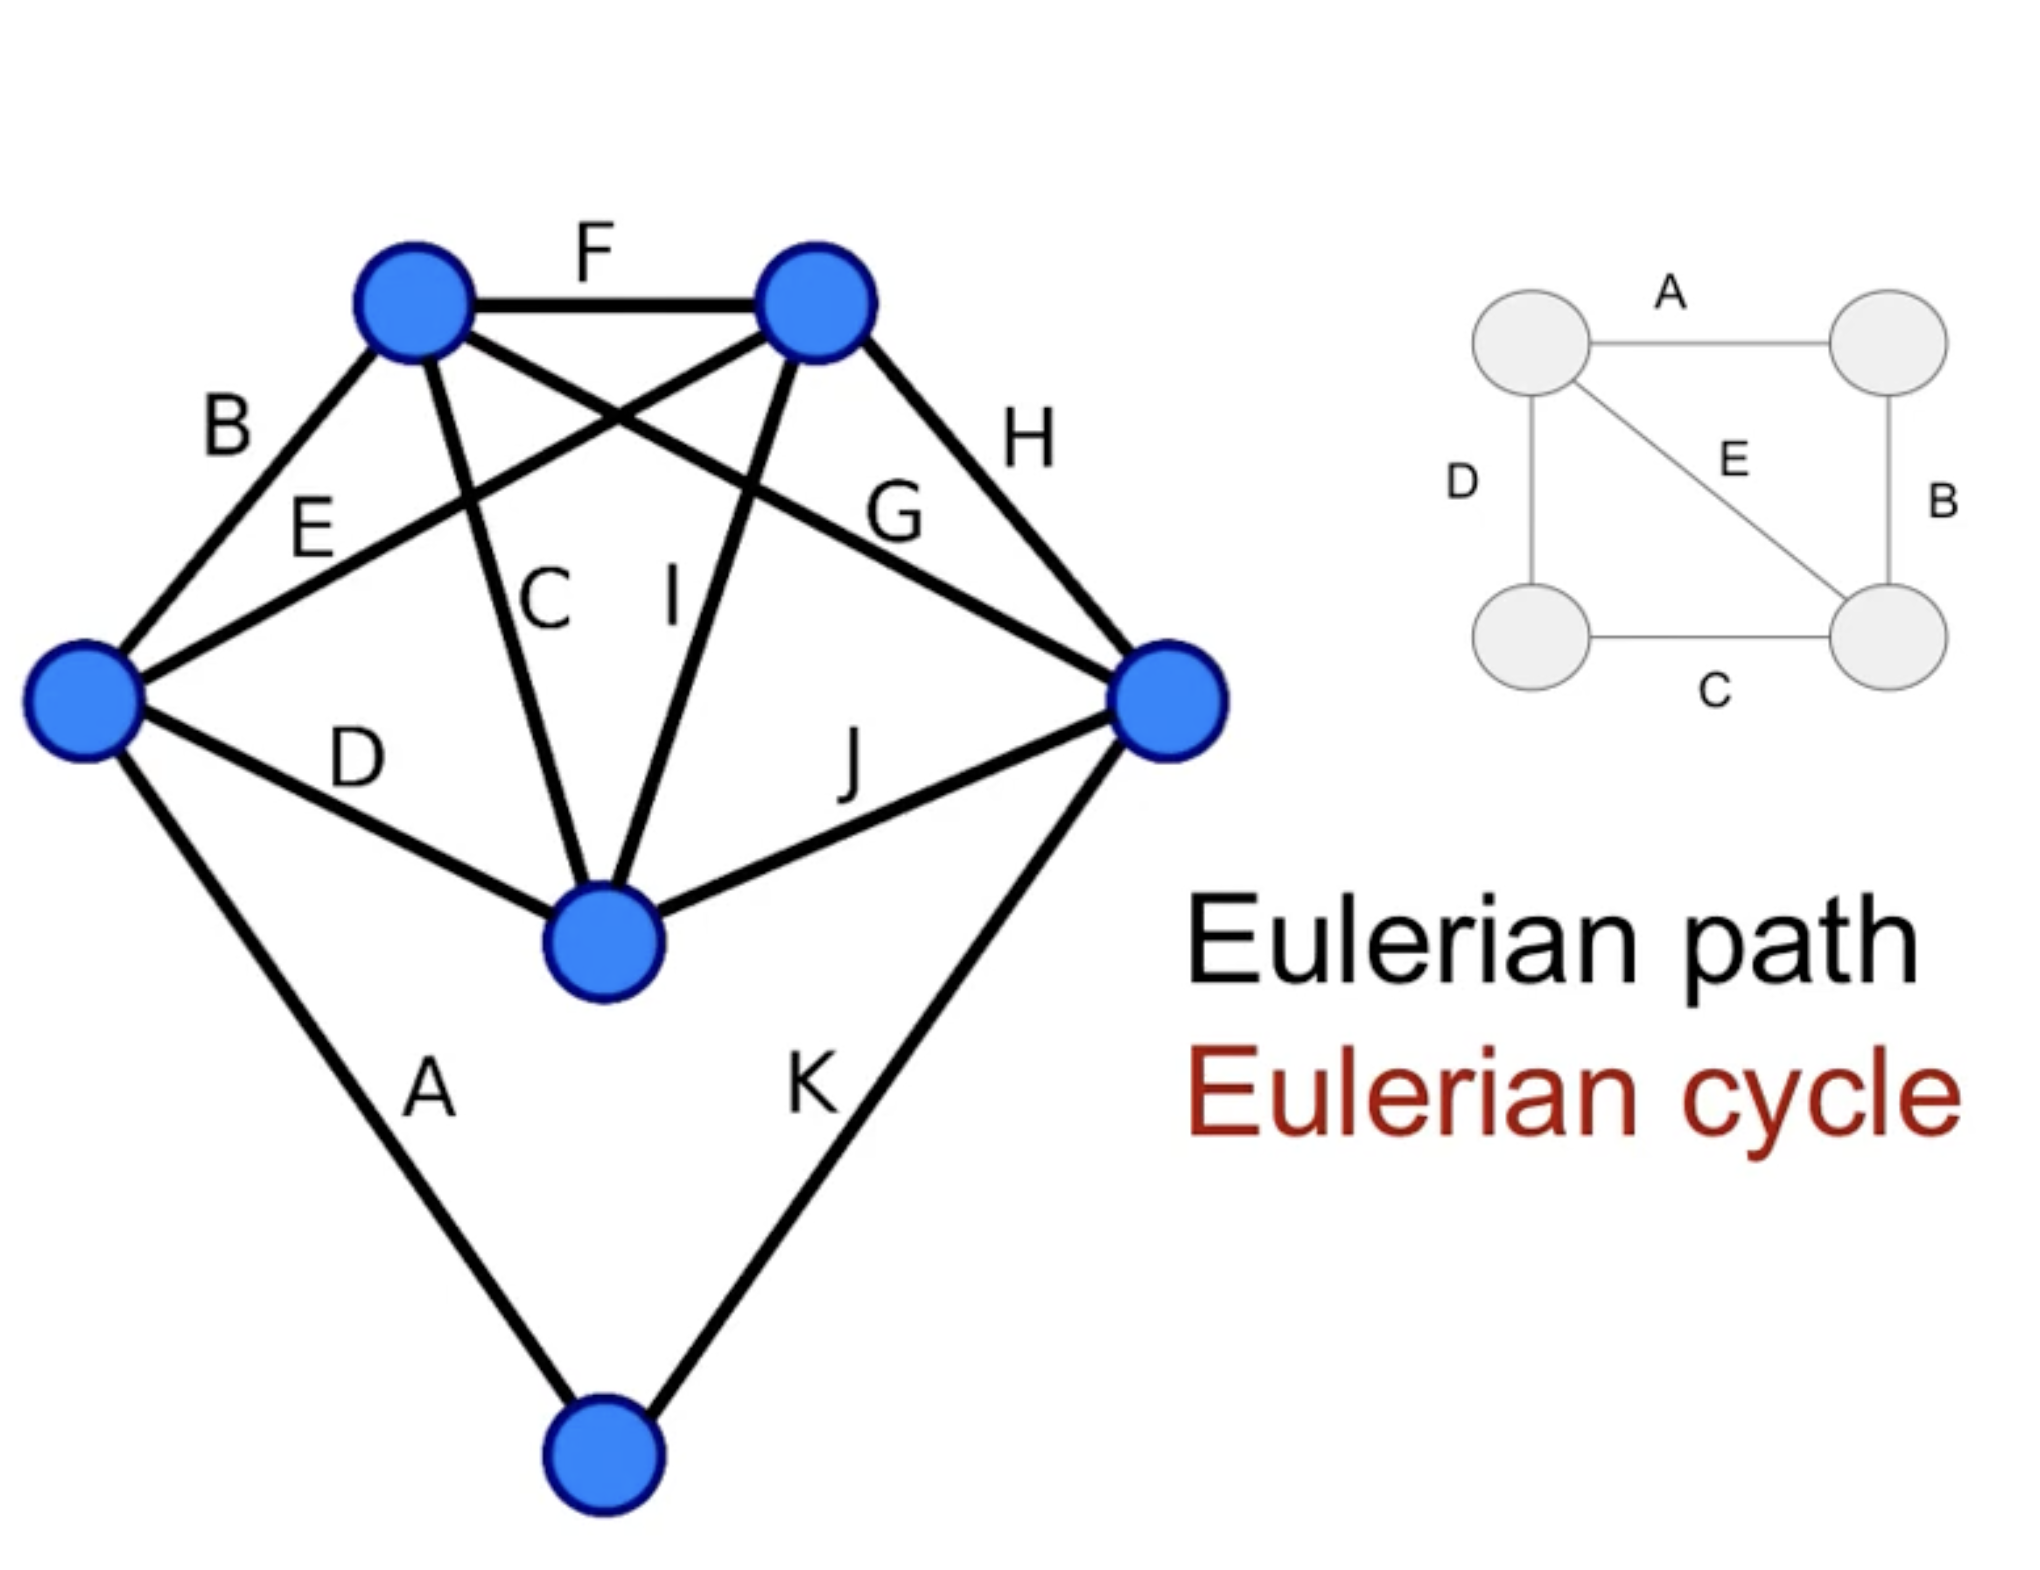

Hamiltonian Problem:
The Hamiltonian problem is concerned with finding a Hamiltonian cycle or path in a graph. A Hamiltonian cycle is a cycle that visits each vertex in a graph exactly once and returns to the starting vertex. A Hamiltonian path visits each vertex exactly once but does not necessarily form a cycle.
In other words, the Hamiltonian problem asks whether there exists a path or cycle that traverses all the vertices of a graph without repetition. The problem is to determine whether a Hamiltonian cycle or path exists in a given graph.

Eulerian Problem:
The Eulerian problem, on the other hand, is about finding an Eulerian cycle or path in a graph. An Eulerian cycle is a cycle that visits every edge in a graph exactly once and returns to the starting vertex. An Eulerian path visits every edge exactly once but does not necessarily form a cycle.
The Eulerian problem deals with determining whether a graph has an Eulerian cycle or path. In an Eulerian cycle, every vertex has an even degree (the number of edges incident to a vertex), while in an Eulerian path, exactly two vertices have an odd degree, and all other vertices have an even degree.

In summary, the Hamiltonian problem focuses on visiting all vertices in a graph, while the Eulerian problem focuses on visiting all edges in a graph. The Hamiltonian problem deals with the existence of Hamiltonian cycles or paths, while the Eulerian problem deals with the existence of Eulerian cycles or paths.

Its possible for a graph to have eulerian cycle even if its disconnected as cycle is visiting every edge of the graph exactly once
If the degree of any vertex is odd, graph cannot have eurian cycle

If a graph is connected, and degree of every vertex is even, it MUST have an eulerian cycle

A connected graph has eulerian cycle if and only if degree of every vertex is even (i.e A=>B & B=>A)

**For eulerian path**
Intermediate vertices need to have an even degree bcoz whenever u enter from unused edge, there must another unsed edge to exit from


Start and end vertex are allowed to have odd degrees coz as either u would ultimately leave it & never come back to it, as in those didn't have to 

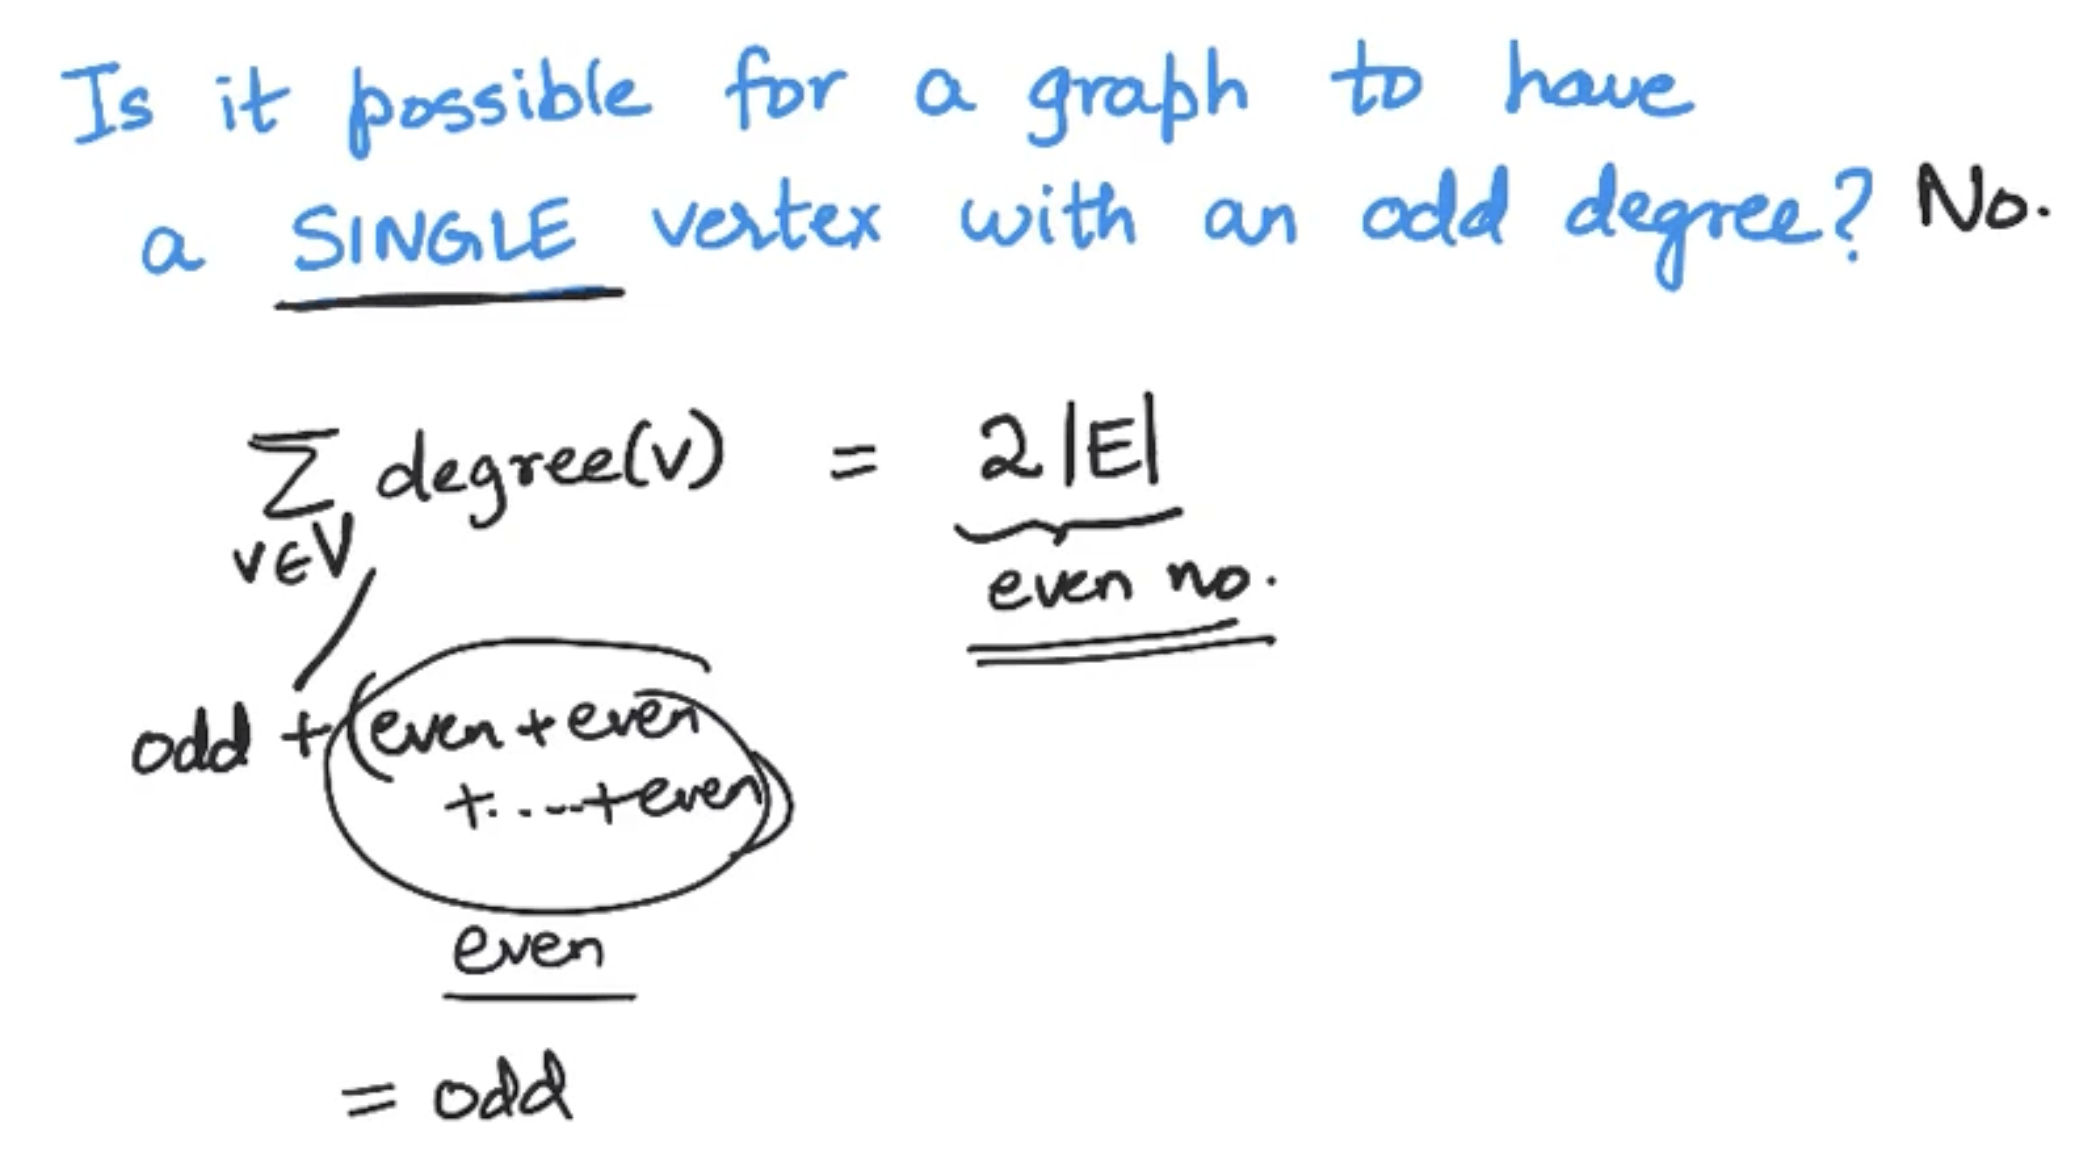

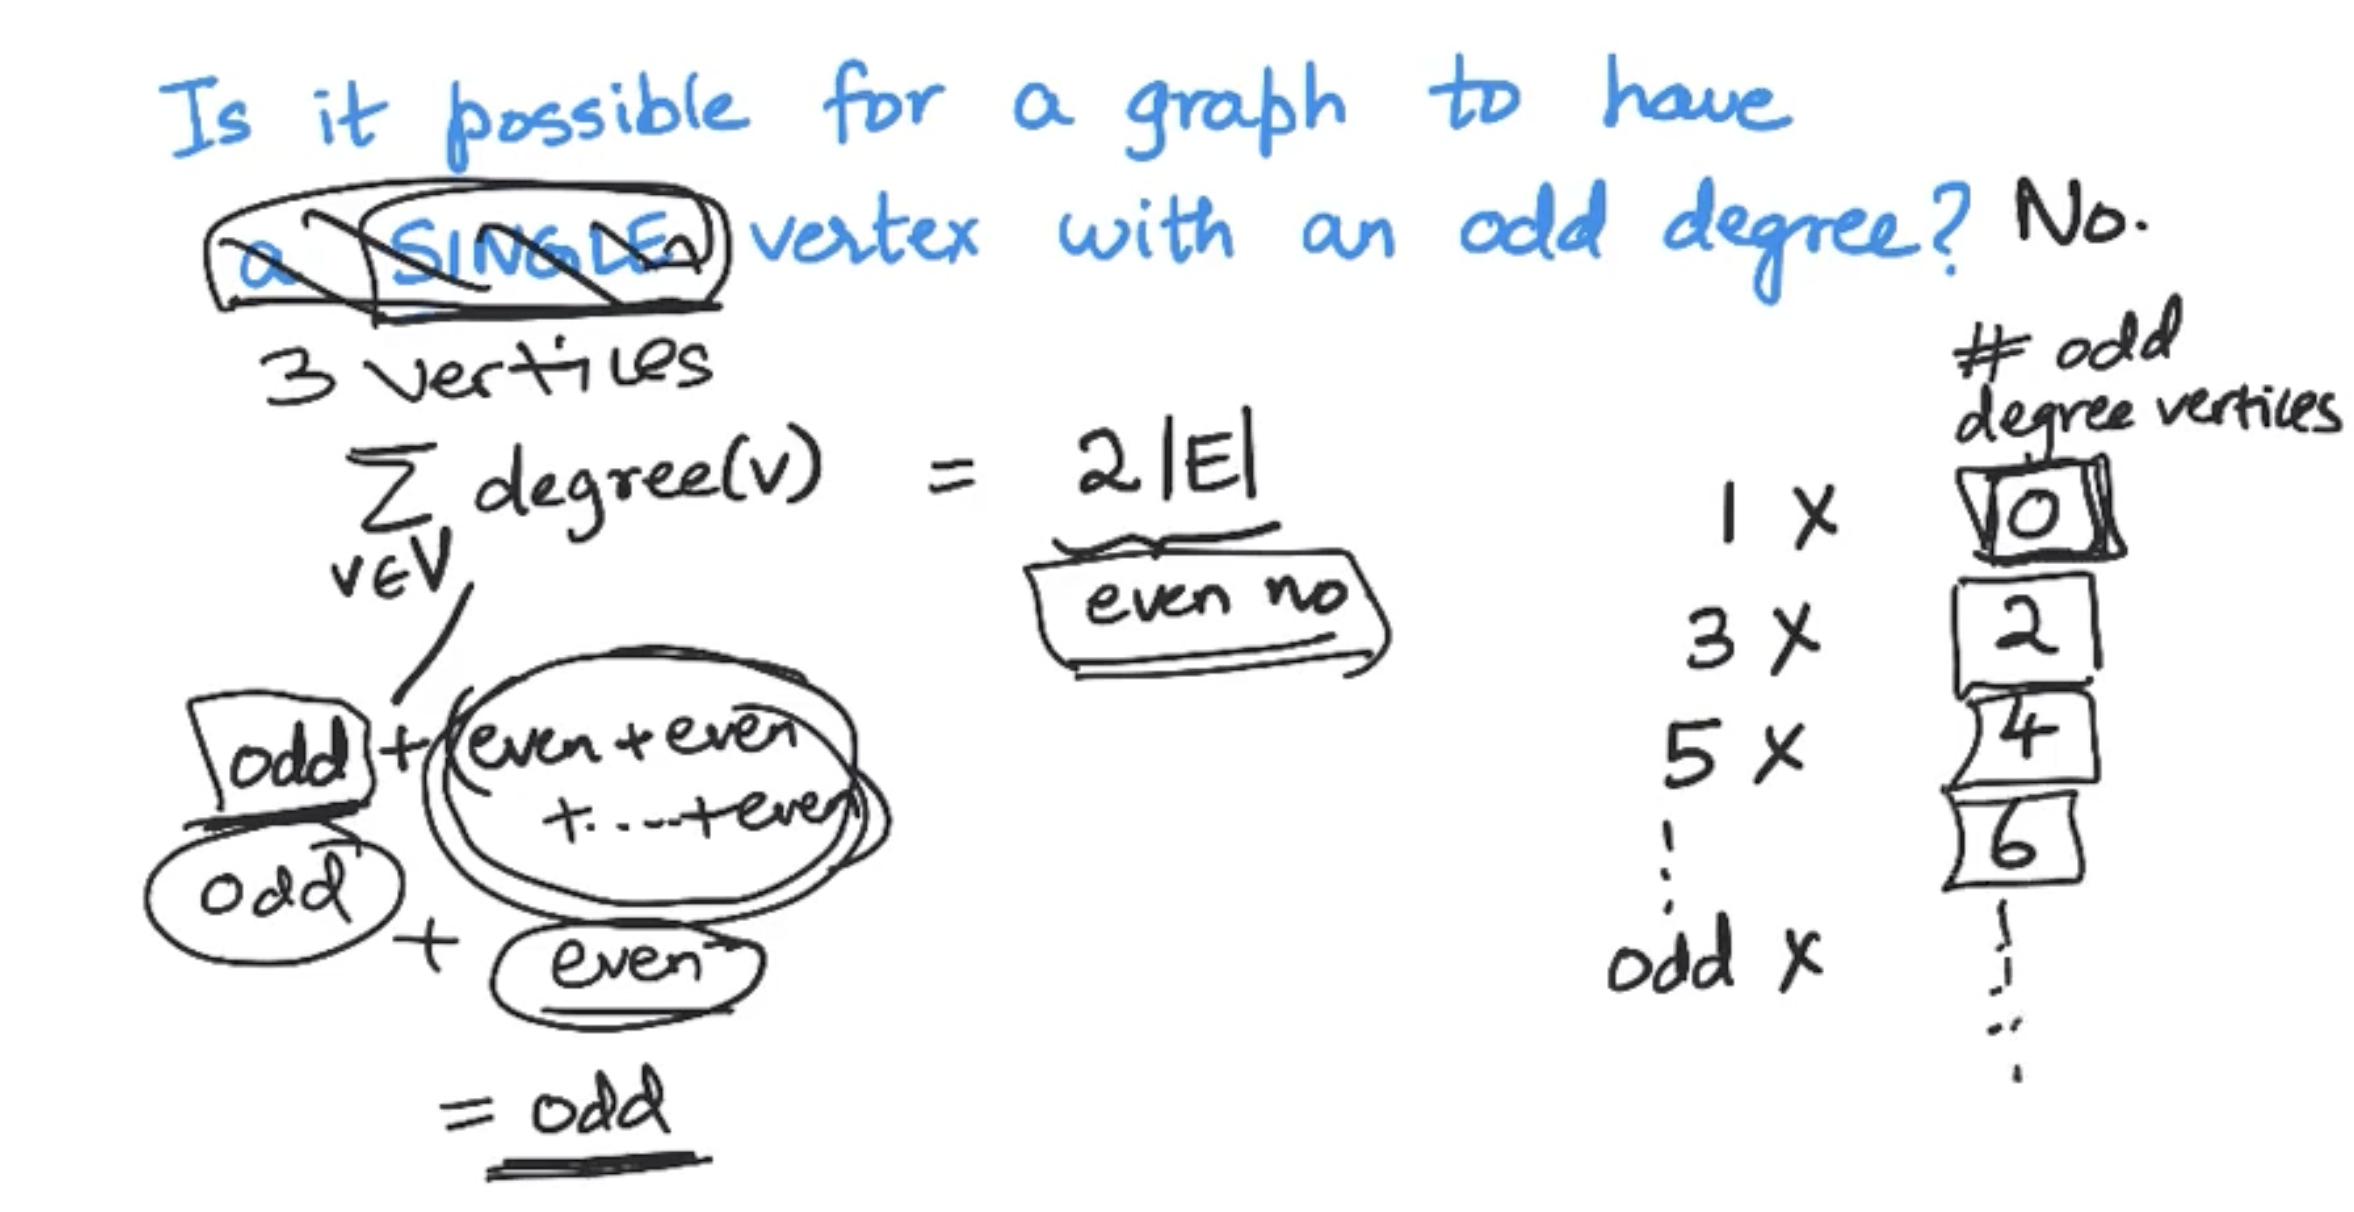

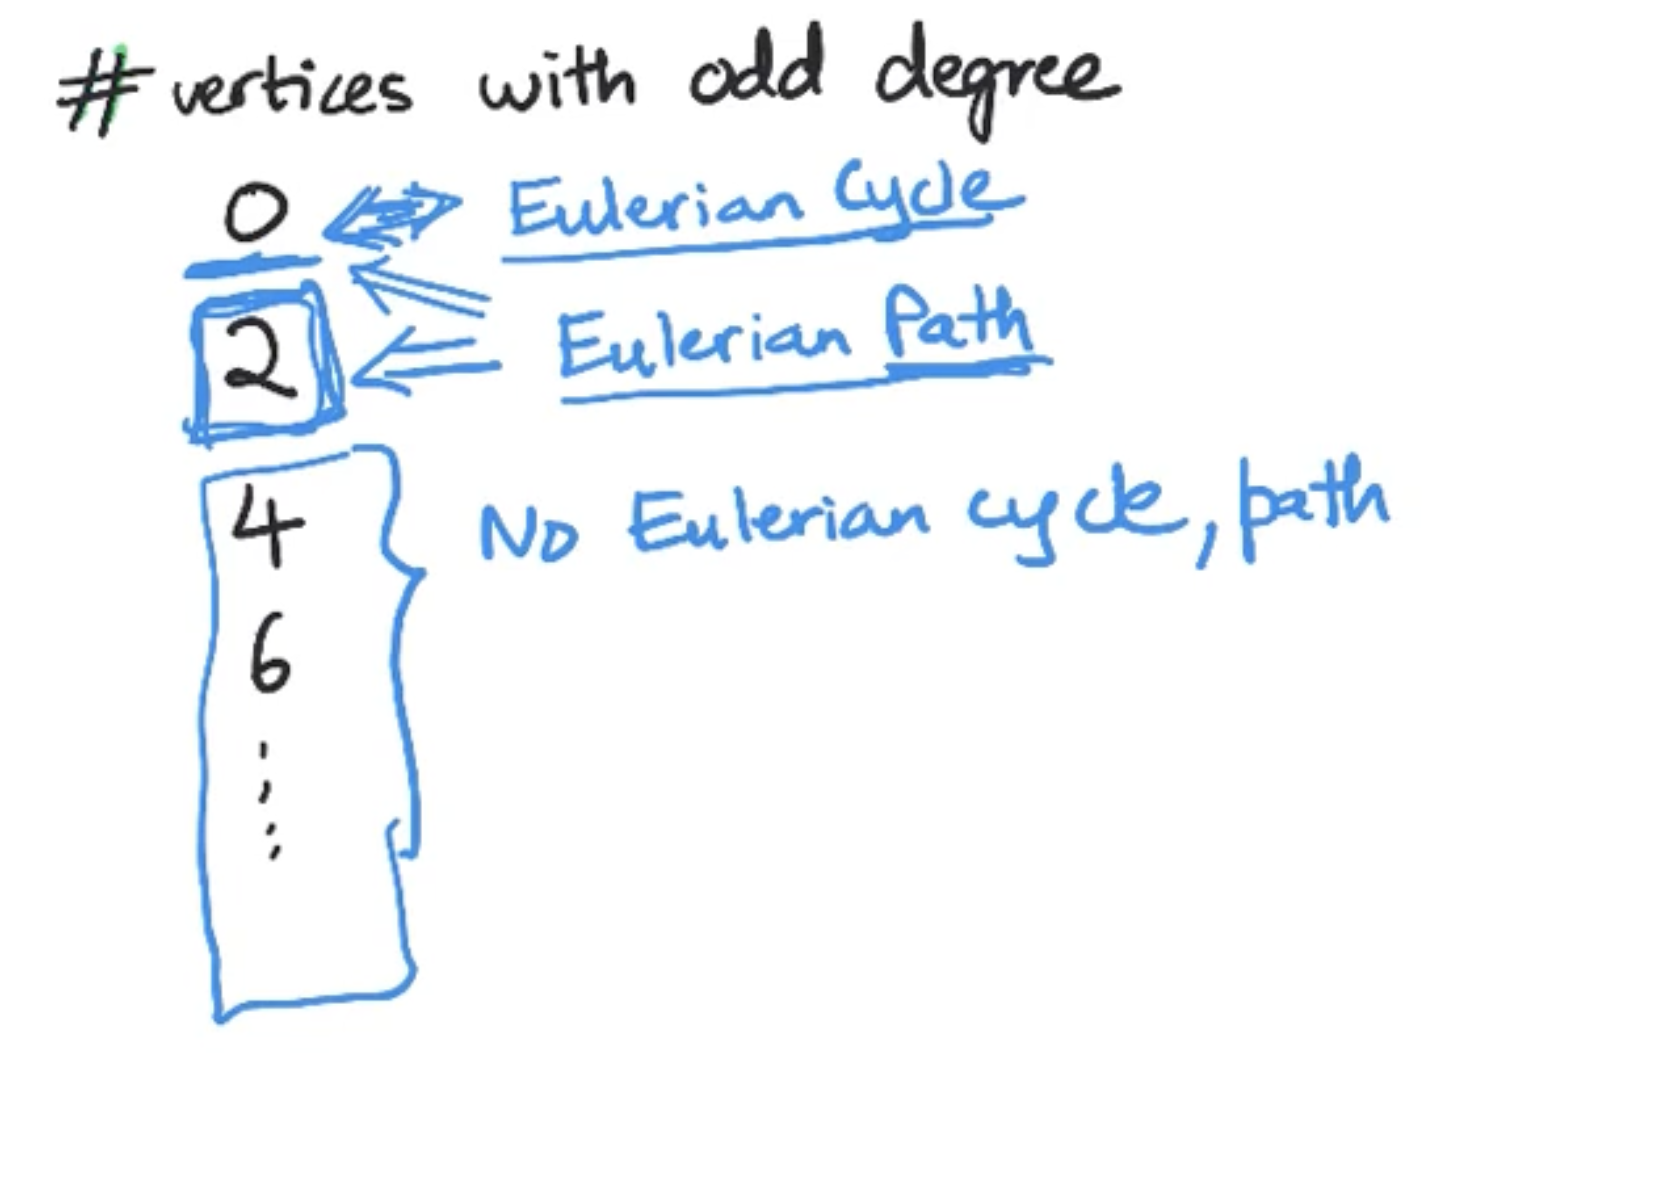

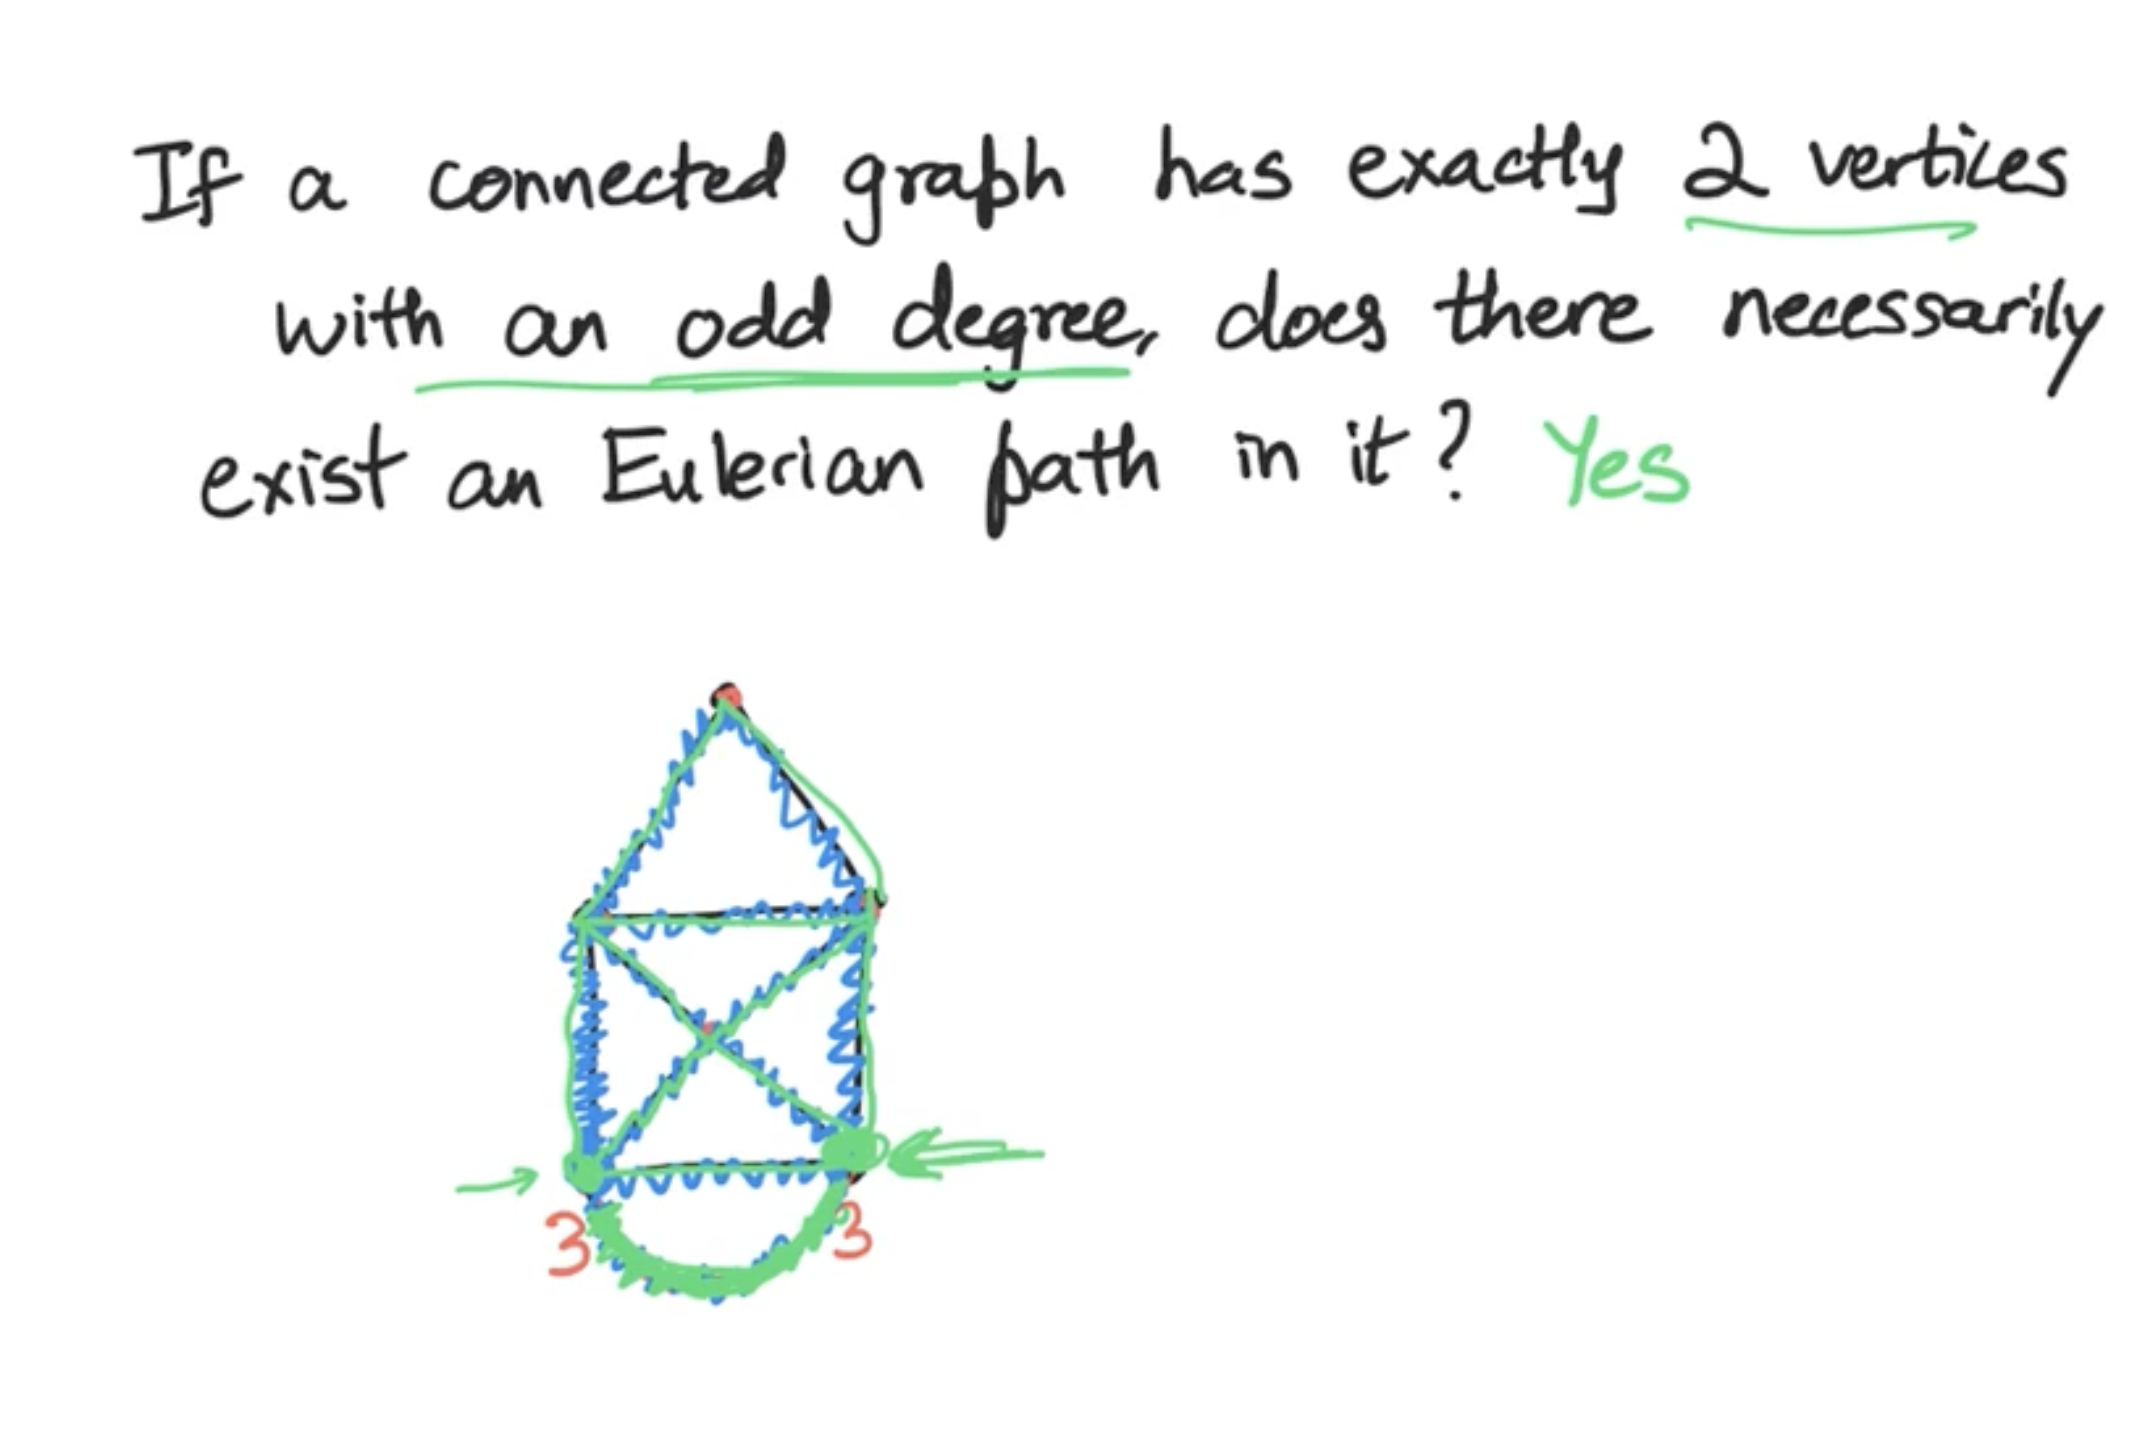

Answer is yes, because if we added a new edge to link these 2 vertices together which have odd degree, resulting graph would have every vertex with even degree. => eulerian cycle => if we remove the edge we added, we'll get eulerian path

**Problem: Check If Eulerian Cycle Exists**

n =5

edges = [
[0, 1],
[0, 2],
[1, 3],
[3, 0],
[3, 2],
[4, 3],
[4, 0]
]


Output: 1

In [17]:
def check_if_eulerian_cycle_exists(n, edges):
    """
    Args:
     n(int32)
     edges(list_list_int32)
    Returns:
     bool
    """
    # for eulerian cycle to exist graph should be connected and all vertices should have even degrees
    degrees = [0]*n
    
    for edge in edges:
        degrees[edge[0]] += 1
        degrees[edge[1]] += 1
        
    for degree in degrees:
        if degree % 2 != 0:
            return False
    
    return True

n =5
edges = [ [0, 1], [0, 2], [1, 3], [3, 0], [3, 2], [4, 3], [4, 0] ]
check_if_eulerian_cycle_exists(n, edges)

True

In [19]:
def check_if_eulerian_path_exists(n, edges):
    """
    Args:
     n(int32)
     edges(list_list_int32)
    Returns:
     bool
    """
    # for path to exist, graph should be connected and 2 or 0 vertices should have odd degrees
    degrees = [0]*n
    
    for edge in edges:
        degrees[edge[0]] += 1
        degrees[edge[1]] += 1
    
    odd_counter = 0   
    for degree in degrees:
        if degree % 2 != 0:
            odd_counter += 1 
     
    if odd_counter == 0 or odd_counter == 2:
        return True
        
    return False

n =5
edges = [ [0, 1], [0, 2], [1, 3], [3, 0], [3, 2], [4, 3], [4, 0] ]
check_if_eulerian_path_exists(n, edges)

True

In [59]:
def convert_edge_list_to_adjacency_list(n, edges):
    """
    Args:
     n(int32)
     edges(list_list_int32)
    Returns:
     list_list_int32
    """
    adjlist = [[] for _ in range(n)]
    
    for edge in edges:
        u = edge[0]
        v = edge[1]
        adjlist[u].append(v)
        adjlist[v].append(u)
        
    for i in range(n):
        adjlist[i].sort()
        
    return adjlist

n= 5
edges=  [[0, 1],[1, 4],[1, 2],[1, 3],[3, 4]]
convert_edge_list_to_adjacency_list(n, edges)

# The above code could also be writtena s 
#for v1,v2 in edges:
 #   adjlist[v2].append(v1)
  #  adjlist[v1].append(v2)

# notice sort line

[[1], [0, 2, 3, 4], [1], [1, 4], [1, 3]]

In [56]:
def convert_edge_list_to_adjacency_matrix(n, edges):
    """
    Args:
     n(int32)
     edges(list_list_int32)
    Returns:
     list_list_bool
    """
    adjmatrix = [ [False]*n for _ in range(n) ] # note [ []*n for _ in range(n) ] won't work, u need a value inside
    
    for u,v in edges:
        adjmatrix[u][v] = True
        adjmatrix[v][u] = True
        
    
    return adjmatrix

convert_edge_list_to_adjacency_matrix(n, edges)

[[False, True, False, False, False],
 [True, False, True, True, True],
 [False, True, False, False, False],
 [False, True, False, False, True],
 [False, True, False, True, False]]

BFS traversal of a graph refers to the Breadth-First Search algorithm applied to traverse or visit all the vertices of a graph in a specific order. It is an algorithmic technique used to explore or search a graph by examining all the vertices and edges in a breadthward motion.

In BFS traversal, the graph is traversed level by level, exploring all the neighbors of a given vertex before moving on to the next level. The algorithm starts at a selected vertex (usually called the "source" vertex) and systematically visits all the vertices connected to it in breadth-first order. It then moves on to the next vertex at the same level, visiting its neighbors, and continues the process until all vertices have been visited.

The main idea behind BFS traversal is to explore the graph in layers or levels, where the first level consists of the source vertex, the second level includes its direct neighbors, the third level includes neighbors of those neighbors, and so on. This approach ensures that all vertices at a particular level are visited before moving on to the vertices at the next level.

During the BFS traversal, a data structure called a queue is typically used to keep track of the vertices that need to be visited. The algorithm works by enqueueing the source vertex, marking it as visited, and then repeatedly dequeuing a vertex, visiting its neighbors, enqueuing the unvisited neighbors, and marking them as visited. This process continues until the queue becomes empty, indicating that all vertices have been visited.

BFS traversal is useful for a variety of graph-related tasks, such as finding the shortest path between two vertices, determining whether a graph is connected, or exploring all reachable vertices from a given source.

In [50]:
    results = [[False]*n for _ in range(n)]

    for i,j in edges:
        results[i][j] = True
        results[j][i] = True
        
    return results

In [37]:
adjlist = [[]]*n
adjlist

[[], [], [], [], []]

In [44]:
results = [[False]*n for _ in range(n)] #When you are not interested in some values returned by a
#function we use underscore in place of variable name . Basically it means you are not interested in 
#how many times the loop is run till now just that it should run some specific number of times overall.
results

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [49]:
[[False]*n for _ in range(n)]

[[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]]

In [47]:
[False]*n 

[False, False, False, False, False]

## PART 3

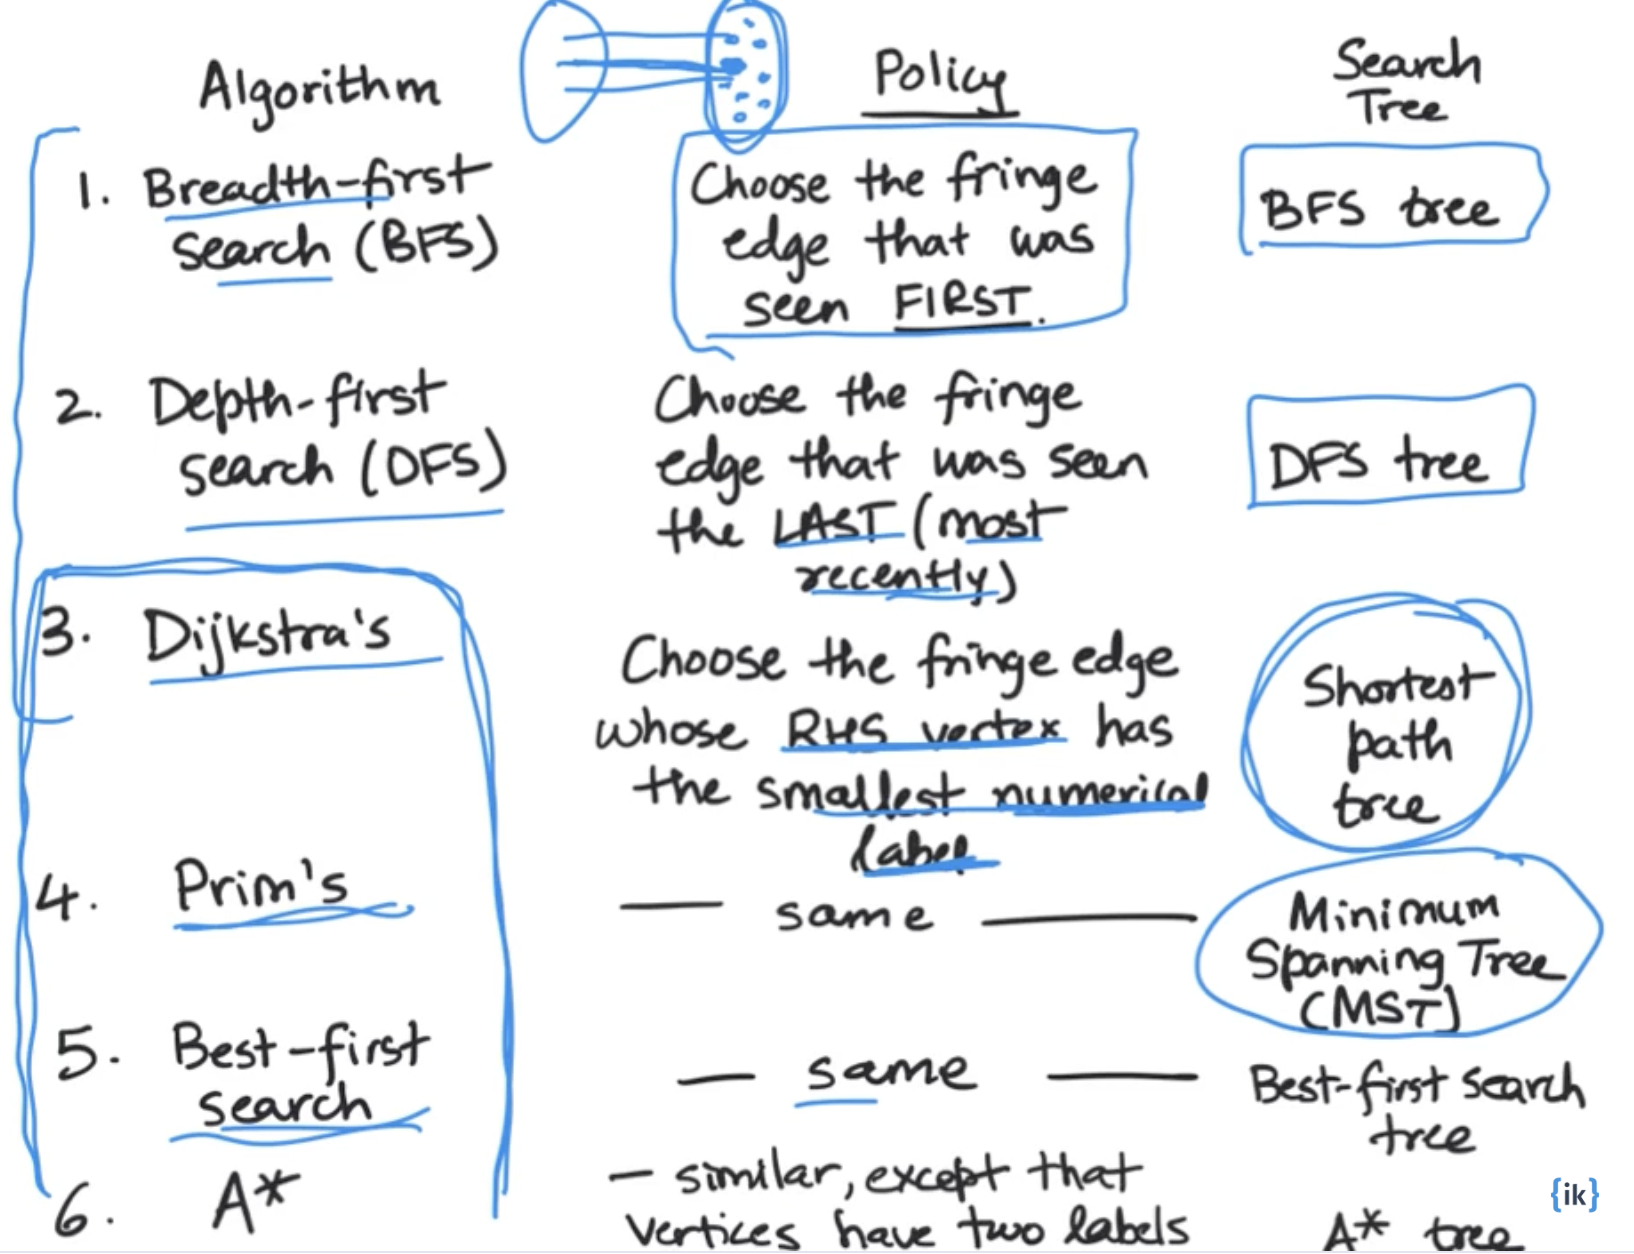

In [ ]:
n= 6
edges[[0, 1],[0, 2],[0, 4],[2, 3]]


#output: [0, 1, 2, 4, 3, 5]

In [ ]:
import collections
def bfs_traversal(n, edges):
    """
    Args:
     n(int32)
     edges(list_list_int32)
    Returns:
     list_int32
    """
    # Write your code here.
    
    # convert to adj list
    adjList = [[] for i in range(n)]
    
    for u,v in edges:
        adjList[u].append(v)
        adjList[v].append(u)
    
    visited = [-1 for i in range(n)]
    result = []

    # print("adj list = ", adjList)
    # if not visited all element invoke multple dfs
    for s in range(n):
        if visited[s] == -1:
            # print("source = ",s)
            visited[s] = 1
            bfs(s,adjList,visited,result)
            # print("visited =", visited, " result = ",result)
    return result

def bfs(s,adjList,visited,result):

    # BFS
    q = collections.deque([s])
    
    while q:
        v = q.popleft()
        result.append(v)
        for neighbor in adjList[v]:
            if visited[neighbor] == -1:
                visited[neighbor] = 1
                q.append(neighbor)